In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape

(2919, 13)

In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


/var/folders/0p/707tjgh95njgr10tv3nym4lr0000gn/T/ipykernel_18475/3487798585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

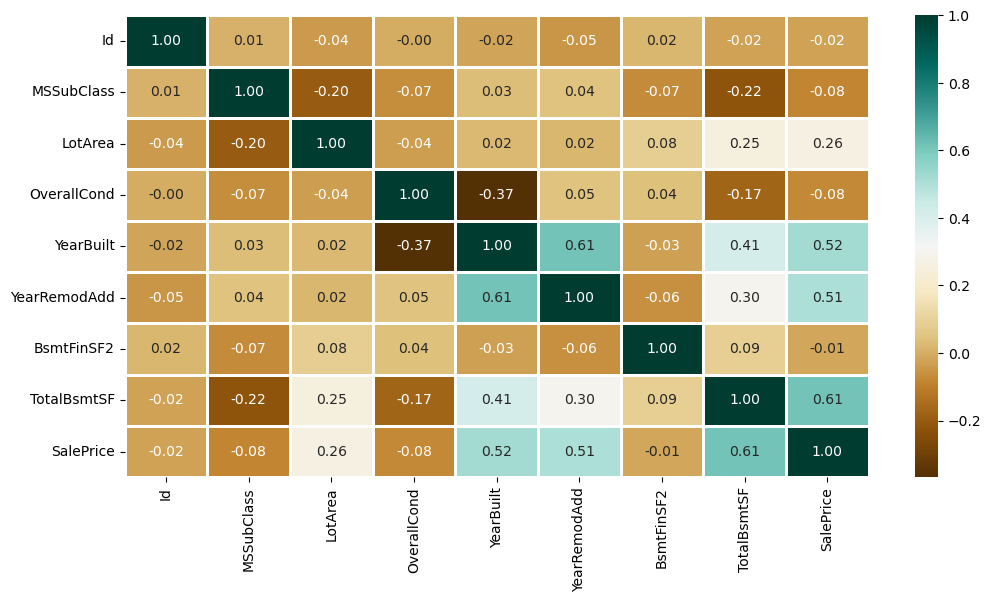

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

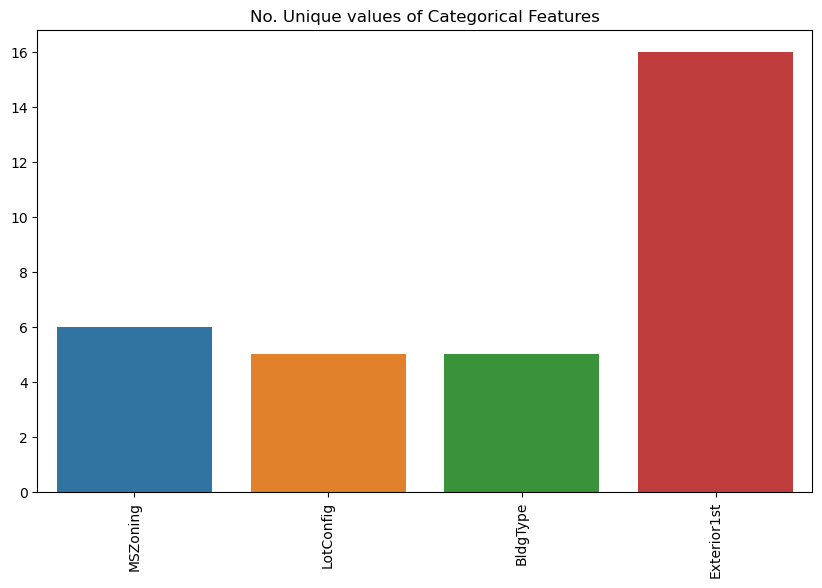

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

/var/folders/0p/707tjgh95njgr10tv3nym4lr0000gn/T/ipykernel_18475/2166598984.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


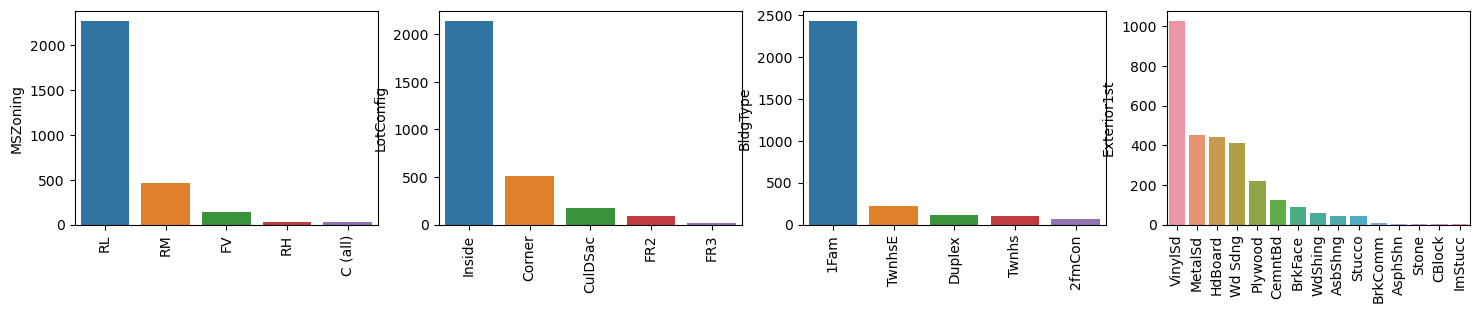

In [7]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [8]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [9]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

In [10]:
new_dataset = dataset.dropna()

In [11]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False, drop='first')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
OH_cols.index = new_dataset.index
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/Users/raysonfernandes/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [15]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18705129312553473


In [16]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.19478947861165377

In [17]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1874202546342788


In [21]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)
 
cb_r2_score= r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56457.2949544	total: 2.1ms	remaining: 2.1s
1:	learn: 55742.6356870	total: 3.32ms	remaining: 1.66s
2:	learn: 55172.7754249	total: 4.46ms	remaining: 1.48s
3:	learn: 54541.8295454	total: 5.52ms	remaining: 1.37s
4:	learn: 53877.5587092	total: 6.59ms	remaining: 1.31s
5:	learn: 53268.2497434	total: 7.78ms	remaining: 1.29s
6:	learn: 52698.9724936	total: 8.99ms	remaining: 1.28s
7:	learn: 52141.4723545	total: 10.2ms	remaining: 1.27s
8:	learn: 51666.1778879	total: 11.2ms	remaining: 1.23s
9:	learn: 51252.1470743	total: 12.3ms	remaining: 1.21s
10:	learn: 50705.6081797	total: 13.3ms	remaining: 1.19s
11:	learn: 50239.3393604	total: 14.4ms	remaining: 1.19s
12:	learn: 49819.8995418	total: 15.3ms	remaining: 1.16s
13:	learn: 49469.9681451	total: 16.4ms	remaining: 1.15s
14:	learn: 49178.7603630	total: 17.1ms	remaining: 1.13s
15:	learn: 48877.3225126	total: 18ms	remaining: 1.1s
16:	learn: 48566.5244228	total: 19ms	remaining: 1.1s
17:	learn: 48251.1475729	total: 20.1

0.3706142059641535